In [1]:
import tensorflow

In [2]:
import numpy as np

# Load the saved files into variables
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [3]:
#Load the saved files into variables
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [4]:
# Shuffle indices for training data
train_indices = np.random.permutation(len(x_train))
x_train_shuffled = x_train[train_indices]
y_train_shuffled = y_train[train_indices]

# Shuffle indices for test data
test_indices = np.random.permutation(len(x_test))
x_test_shuffled = x_test[test_indices]
y_test_shuffled = y_test[test_indices]


x_train=x_train_shuffled
y_train=y_train_shuffled
x_test_=x_test_shuffled 
y_test=y_test_shuffled

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25102, 64, 64)
(6236, 64, 64)
(25102,)
(6236,)


In [9]:
x_train[4].shape

(64, 64)

In [10]:
label_to_int = {'angry': 0, 'happy': 1, 'sad':2, 'fearful':3, 'neutral':4}

def get_name(n):
    for emotion, label in label_to_int.items():
        if label == n:
            return emotion
    return "Label not found"  # Return a default value if label is not found


'sad'

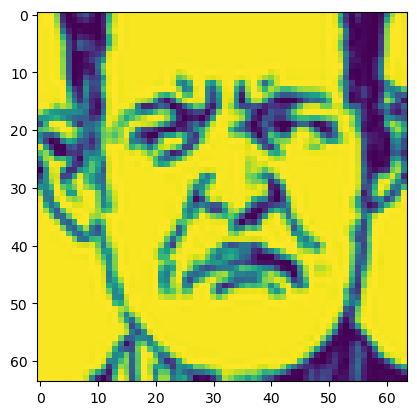

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[17034])
get_name(y_train[17034])

In [12]:
# import cv2
# import numpy as np

# resized_images = []
# for img in x_train:
#     # Convert from RGB to BGR
#     img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     resized = cv2.resize(img_bgr, (32, 32))
#     grayscale_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#     resized_images.append(grayscale_image)

# x_train_resized = np.array(resized_images)

# # Now x_train_resized contains the resized images with shape (25102, 32, 32)
# print(x_train_resized.shape)

In [13]:
# resized_images = []
# for img in x_test:
#     # Convert from RGB to BGR
#     img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     resized = cv2.resize(img_bgr, (32, 32))
#     grayscale_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#     resized_images.append(grayscale_image)

# x_test_resized = np.array(resized_images)

# # Now x_train_resized contains the resized images with shape (25102, 32, 32)
# print(x_test_resized.shape)

In [14]:
# x_train = x_train_resized
# x_test = x_test_resized

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25102, 64, 64)
(25102,)
(6236, 64, 64)
(6236,)


'sad'

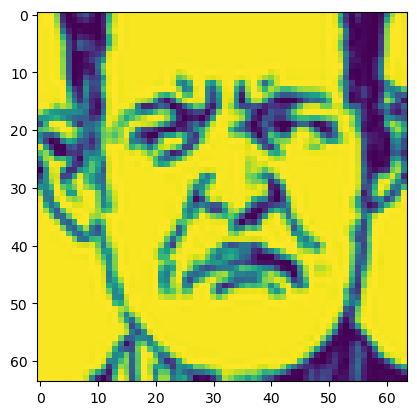

In [16]:
plt.imshow(x_train[17034])
get_name(y_train[17034])

In [17]:
import numpy as np 
x_train = x_train.reshape(-1, 64*64)
x_test = x_test.reshape(-1, 64*64)

In [18]:
x_train = x_train/255
x_test = x_test/255

In [53]:
x_train.shape

(25102, 4096)

In [54]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [55]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.regularizers import l1_l2
l1_reg = 0.001
l2_reg = 0.01

model.add(Dense(units=4096, input_shape=(4096, ),activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=2048, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(units=1024, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_31 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_32 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_33 (Dense)            (None, 512)               524800    
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 64)               

In [56]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(verbose=1, monitor='val_loss', patience=5)
history=model.fit(x_train, y_train, verbose=1, validation_data=(x_test, y_test), batch_size=30, epochs=50, callbacks=[callbacks])

Epoch 1/50
837/837 [==============================] - 133s 157ms/step - loss: 1.5975 - sparse_categorical_accuracy: 0.2850 - val_loss: 1.5851 - val_sparse_categorical_accuracy: 0.2845
Epoch 2/50
837/837 [==============================] - 166s 198ms/step - loss: 1.5846 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.5847 - val_sparse_categorical_accuracy: 0.2845
Epoch 3/50
837/837 [==============================] - 122s 145ms/step - loss: 1.5845 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.5849 - val_sparse_categorical_accuracy: 0.2845
Epoch 4/50
837/837 [==============================] - 120s 144ms/step - loss: 1.5845 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.5848 - val_sparse_categorical_accuracy: 0.2845
Epoch 5/50
837/837 [==============================] - 121s 144ms/step - loss: 1.5845 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.5848 - val_sparse_categorical_accuracy: 0.2845
Epoch 6/50
837/837 [==============================] - 124s 148ms/step - loss: 1.

In [52]:
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

In [25]:
epochs = range(1, len(train_accuracy)+1)

In [26]:
epochs

range(1, 10)

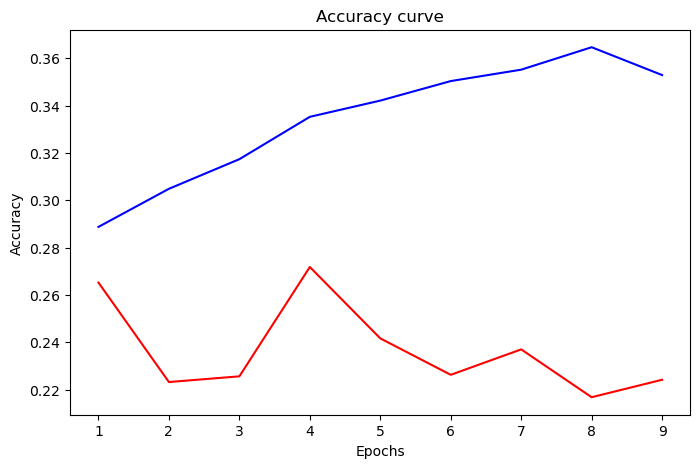

In [27]:
plt.figure(figsize=(8,5))
plt.plot(epochs, train_accuracy, 'b', label='Train Accuray')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.show()

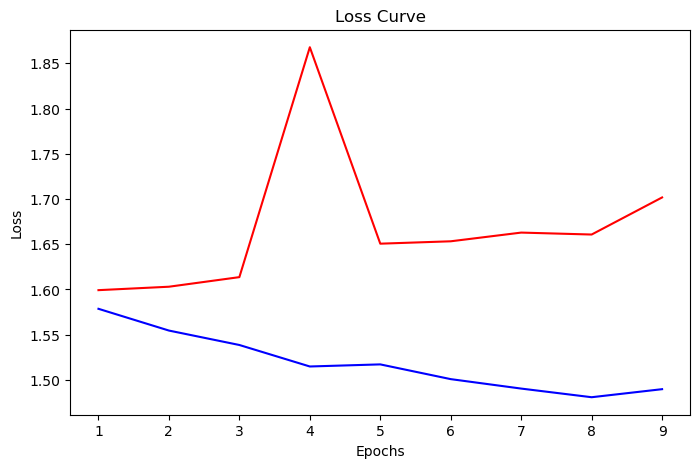

In [28]:
plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, 'b', label='Train Loss' )
plt.plot(epochs, test_loss, 'r', label='Train Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [29]:
loss, accuracy = model.evaluate(x_test, y_test)

195/195 [==============================] - 0s 1ms/step - loss: 1.7017 - sparse_categorical_accuracy: 0.2242


In [30]:
loss

1.70171320438385

In [31]:
accuracy

0.22418217360973358

In [32]:
prediction= model.predict(x_test)

195/195 [==============================] - 0s 1ms/step


In [33]:
prediction

array([[0.16834894, 0.5387238 , 0.11616994, 0.11464442, 0.06211282],
       [0.18741171, 0.2459695 , 0.20516008, 0.1818782 , 0.17958046],
       [0.12737201, 0.5609926 , 0.09872507, 0.10594952, 0.1069608 ],
       ...,
       [0.17633678, 0.20752242, 0.20983188, 0.1855742 , 0.22073467],
       [0.19748029, 0.1773132 , 0.240003  , 0.19723497, 0.18796857],
       [0.19223632, 0.16572563, 0.2440581 , 0.19921683, 0.19876307]],
      dtype=float32)

In [34]:
prediction.shape

(6236, 5)

In [35]:
prediction_values = np.argmax(prediction, axis=1)

In [36]:
prediction_values

array([1, 1, 1, ..., 4, 2, 2])

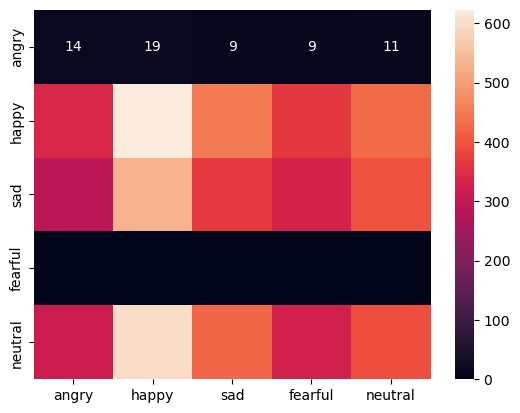

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(prediction_values, y_test)

import seaborn as sns 

sns.heatmap(cm, annot=True, xticklabels=label_to_int , yticklabels=label_to_int, fmt='d')

plt.show()